# **California Housing Prices**

This dataset contains information about houses in various California districts, based on the 1990 census data. The dataset provides valuable insights into housing attributes and demographics, enabling a comprehensive analysis of housing prices and related factors.

The dataset includes the following attributes:
1. **longitude**: A measure of how far west a house is located; higher values indicate locations farther west.
2. **latitude**: A measure of how far north a house is located; higher values indicate locations farther north.
3. **housingMedianAge**: The median age of houses within a block; lower numbers indicate newer buildings.
4. **totalRooms**: The total number of rooms within a block.
5. **totalBedrooms**: The total number of bedrooms within a block.
6. **population**: The total number of people residing within a block.
7. **households**: The total number of households within a block, where a household is a group of people residing within a home unit.
8. **medianIncome**: The median income for households within a block (measured in tens of thousands of US Dollars).
9. **medianHouseValue**: The median house value for households within a block (measured in US Dollars).
10. **oceanProximity**: The location of the house with respect to the ocean/sea.

The objective of this project is to perform data processing and exploratory data analysis on the dataset. The goal is to prepare a dataset composed of useful values and features to perform a regression task aimed at predicting median house values.

# **Setup**

The Setup section includes the requisite code to initiate the Big Data Analysis.

The connection to Google Drive is established, and the Kaggle credentials are stored.
The dataset is downloaded, extracted, and loaded into the notebook.

---
**Connecting Google Drive**

In [1]:
from google.colab import drive
import os

# Mounts the google drive folder and change the dir to the specified one
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/Project/') # Change with your dir

Mounted at /content/drive


---
**Setting Kaggle Credentials**

In [4]:
from google.colab import userdata
import os

# Sets environ variables for Kaggle
os.environ['KAGGLE_USERNAME'] = userdata.get('USER')
os.environ['KAGGLE_KEY'] = userdata.get('KAGGLE_KEY')

---
**Getting the Dataset**


In [ ]:
!pip install kaggle
!kaggle datasets download camnugent/california-housing-prices
!unzip /content/drive/MyDrive/Project/california-housing-prices.zip

---
**Libraries imports**

In [33]:
!pip install mlflow dagshub --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.3/28.3 MB 45.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 70.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.2/258.2 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 49.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 637.5/637.5 kB 29.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.2/203.2 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.8/50.8 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [34]:
import pandas as pd
from pandas.plotting import scatter_matrix

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tensorflow as tf
import numpy as np

import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, PowerTransformer, RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors, LocalOutlierFactor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

import mlflow
from mlflow.tracking import MlflowClient

import dagshub

import patsy
import folium as folium
from folium import plugins
from folium.plugins import HeatMap

---
**Dataset Import**

After extracting the dataset into Google Drive and loading it into a Pandas DataFrame, the attributes and shape of the dataset are printed to provide information to the user. Duplicate rows are then removed.

In [7]:
# Imports the raw data
df = pd.read_csv('housing.csv')

# Prints the shape and the columns of the dataframe
print(df.columns)
print(f'Raw dataframe shape: {df.shape}')

# Drops the duplicates
df = df.drop_duplicates()
print(f'Raw dataframe shape after dropping duplicates: {df.shape}')

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')
Raw dataframe shape: (20640, 10)
Raw dataframe shape after dropping duplicates: (20640, 10)


Based on the shape of the dataset, it is evident that there were no duplicate records.

# **Raw Data Visualization**

This section includes the code used to output the raw dataset attributes, providing a better understanding of the underlying distributions of the data.

---
**Preprocessing String Data**

Before continuing with the analysis, it is important to standardize the string values in the 'ocean_proximity' attribute. The values are converted to lowercase, and spaces are replaced with underscores.

In [8]:
# Converts the values to lowercase and replaces whitespaces
df['ocean_proximity'] = df['ocean_proximity'].str.lower()
df['ocean_proximity'] = df['ocean_proximity'].str.replace(' ', '_')

# Visualises a preview of the dataframe
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        near_bay  
1      2401.0      1138.0         8.3014            358500.0        near_bay  
2       496.0       177.0         7.2574            352100.0        near_bay  
3       558.0       219.0         5.6431            341300.0        near_bay  
4       565.0       259.0         3.8462            342200.0        near_bay

---
**Geographical Attributes Visualization**

The optimal method for visualizing coordinates is to plot them on a map. Below, the records are plotted on a map of California, highlighting the density distribution.

In [9]:
# Plots the density of house records on the California map
california_map = folium.Map(location=[36.7783,-119.4179], zoom_start = 6, min_zoom=5)
df_map = df[['latitude', 'longitude']]
data = [[row['latitude'],row['longitude']] for index, row in df_map.iterrows()]
HeatMap(data, radius=10).add_to(california_map)
california_map

The density map reveals a higher concentration of records in the areas surrounding major cities.

---
**Numerical and Categorical Attributes Visualization**

For the remaining attributes, histograms are created to visualize their underlying distributions.

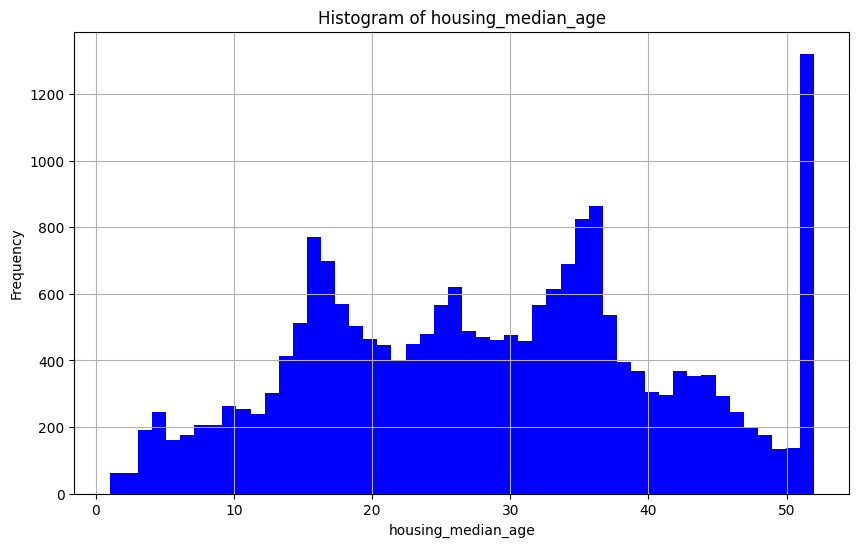

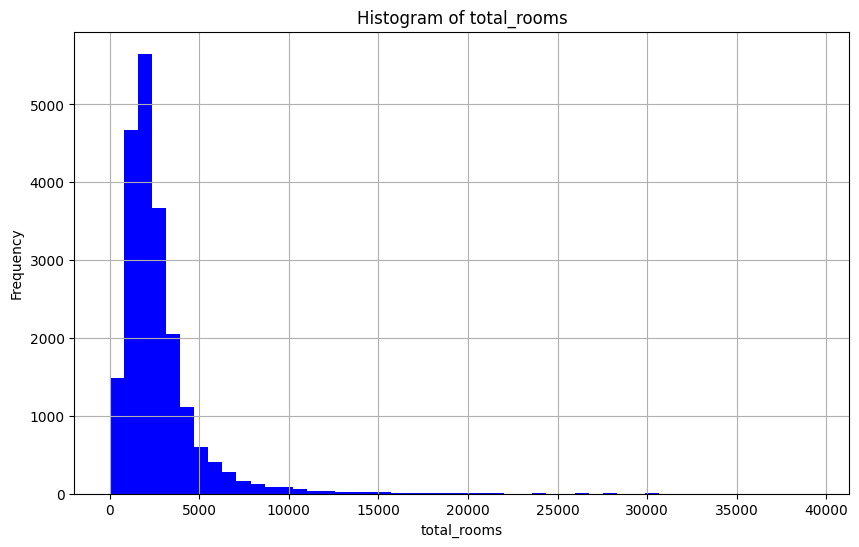

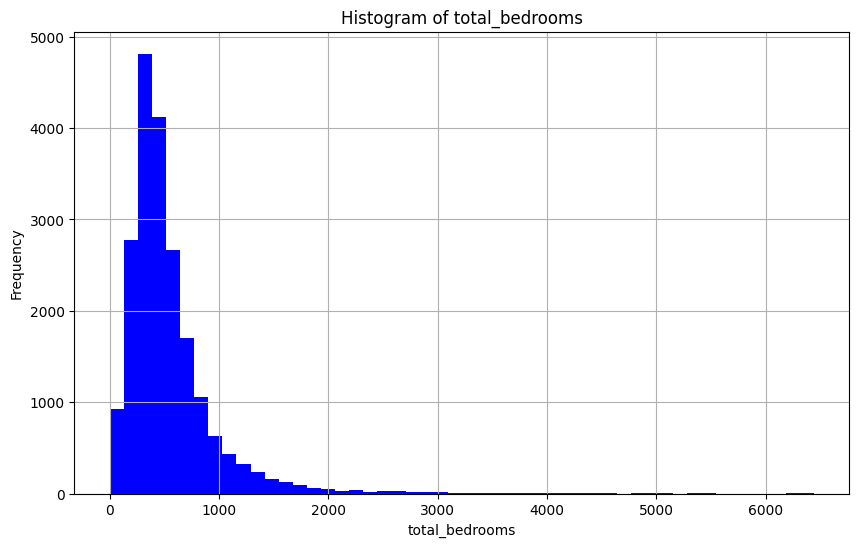

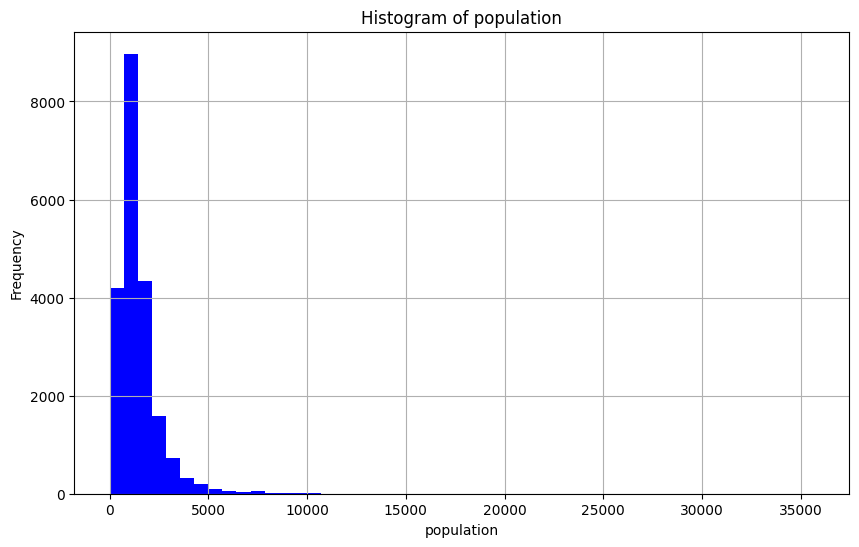

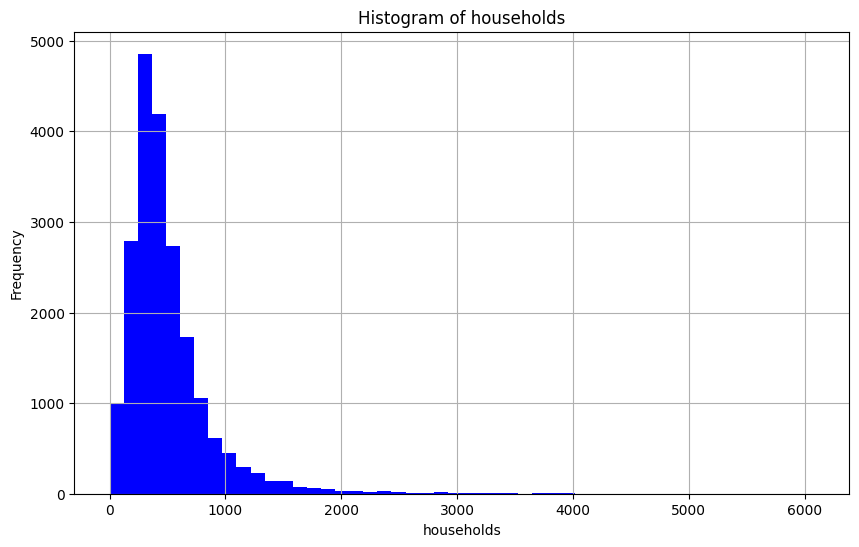

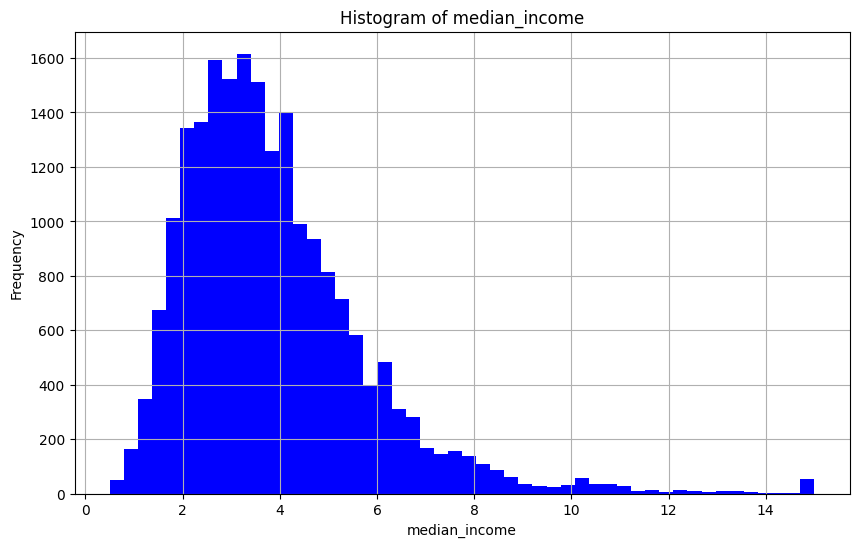

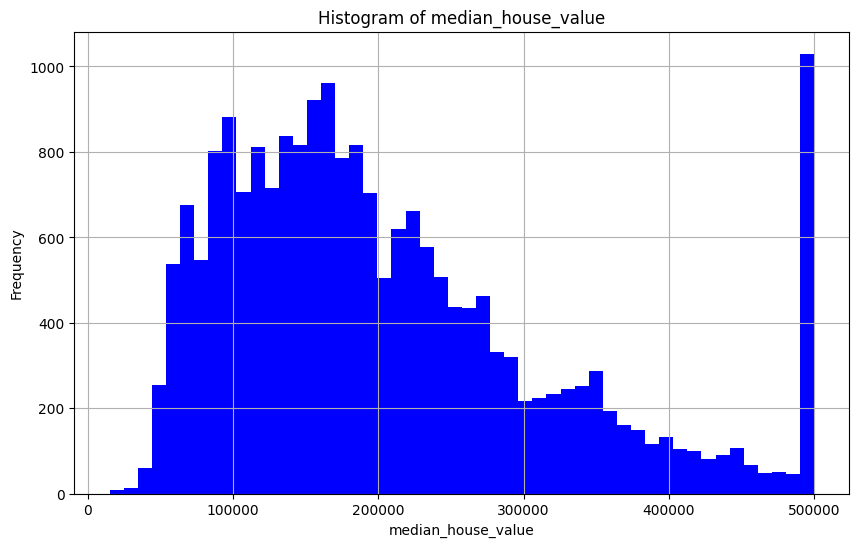

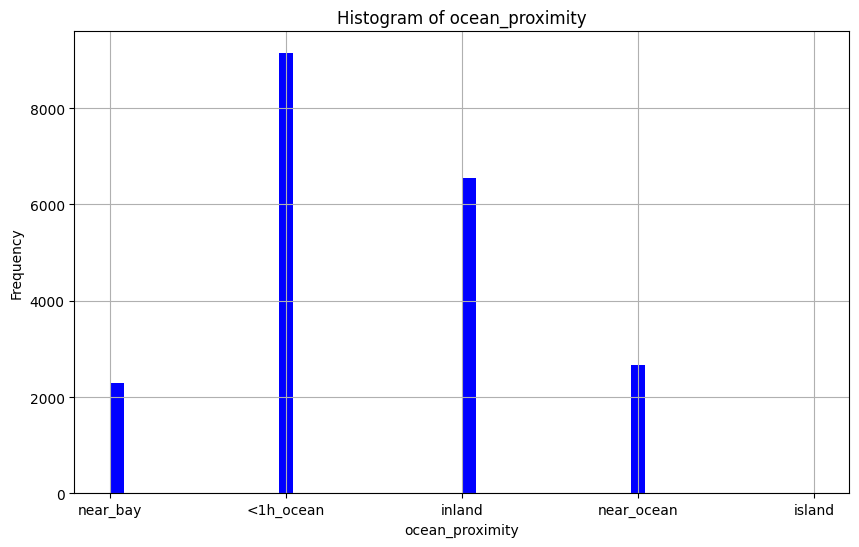

In [11]:
# Plots the histogram of the dataframe attributes
for attr in df.columns:
    if attr not in ['latitude', 'longitude']:
        plt.figure(figsize=(10, 6))
        df[attr].hist(color='blue', bins=50)
        plt.xlabel(attr)
        plt.ylabel('Frequency')
        plt.title(f'Histogram of {attr}')
        plt.show()

From these plots, it is evident that the majority of attributes follow a skewed normal distribution. However, for three attributes ('housing_median_age', 'median_house_value', and 'ocean_proximity'), anomalies are present.

# **Removing Anomalies**

This section provides a detailed analysis of the anomalies identified during the raw data visualization.

---
**Categorical Attribute**

ocean_proximity
<1h_ocean     9136
inland        6551
near_ocean    2658
near_bay      2290
island           5
Name: count, dtype: int64


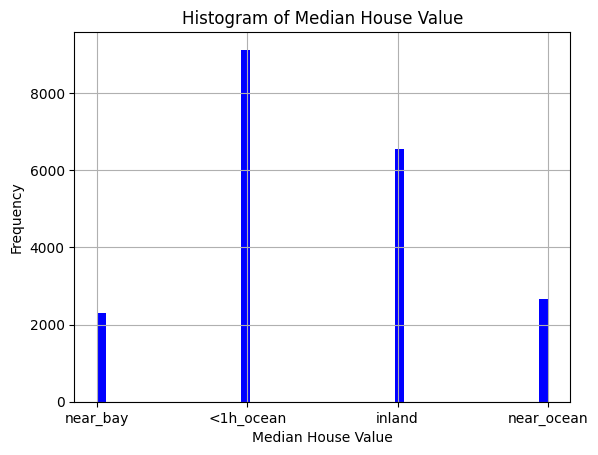

In [12]:
# Prints the number of records for each value of the attribute
print(df['ocean_proximity'].value_counts())

# Removes 'island' records from the DataFrame and plots the histogram
df = df[df['ocean_proximity'] != 'island']
df['ocean_proximity'].hist(color='blue', bins=50)
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.title('Histogram of Median House Value')
plt.show()

The value 'island' appears only 5 times in the dataset, representing a mere 0.024%. It is best to remove these values because the categorical attribute 'ocean_proximity' will undergo dummification, which would create an additional attribute without meaningful contribution.

---
**Numerical Attributes**

The following attributes exhibit the phenomenon of upper range capping. Specifically, all values greater than 52 years for 'housing_median_age' and $500,001 for 'median_house_value' have been capped at these particular values, likely due to data capping or censorship.

Upper range capping is a technique used to limit the maximum value recorded for an attribute, often to protect privacy or to handle outliers. In this dataset, it seems that values beyond these thresholds were intentionally constrained, resulting in a plateau at the upper limit. This can affect the analysis by masking the true distribution of these attributes beyond the capped values.

Number of records with housing_median_age >= 52: 1270
Number of records with median_house_value >= 500000: 965


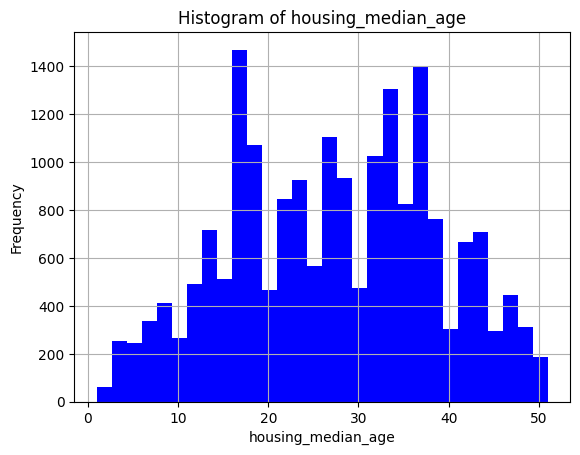

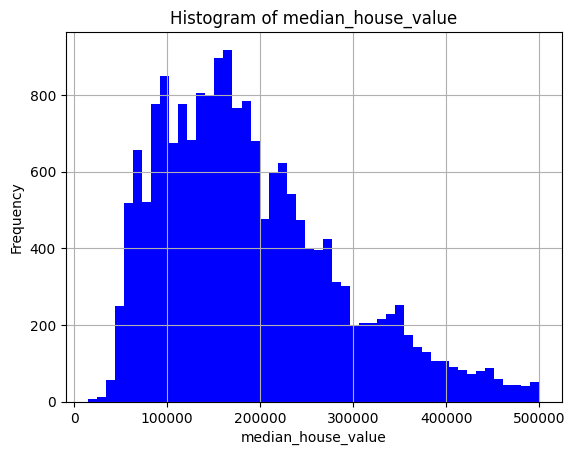

In [13]:
# Counts the number of records capped at the maximum values for the 2 attributes
n_age = df[df['housing_median_age'] >= 52]['housing_median_age'].count()
n_value = df[df['median_house_value'] >= 500001]['median_house_value'].count()

print(f'Number of records with housing_median_age >= 52: {n_age}')
print(f'Number of records with median_house_value >= 500000: {n_value}')

# Removes the 'outlier' records from the DataFrame
df = df[df['housing_median_age'] < 52]
df['housing_median_age'].hist(color='blue', bins=30)
plt.xlabel('housing_median_age')
plt.ylabel('Frequency')
plt.title('Histogram of housing_median_age')
plt.show()

# Removes the 'outlier' records from the DataFrame
df = df[df['median_house_value'] < 500001]
df['median_house_value'].hist(color='blue', bins=50)
plt.xlabel('median_house_value')
plt.ylabel('Frequency')
plt.title('Histogram of median_house_value')
plt.show()

These values are considered outliers and are removed to avoid biasing the analysis and prediction. By eliminating these capped values, we ensure a more accurate and representative analysis of the dataset's underlying trends and patterns.

# **Central Tendency Analysis**

This section includes the code to perform a Central Tendency Analysis on the dataset attributes, providing insights into the central values and dispersion measures of the data.

In [14]:
# For skewed distribution it's better to used IQR values instead of only 1 metrics
def df_central_tendency_analysis(input_df: pd.DataFrame) -> None:
    """Analyzes and prints the central tendency statistics for the dataframe attributes.

    This function calculates and prints the median and interquartile range (IQR) for numerical columns,
    as well as the mode for the 'ocean_proximity' categorical column.

    Args:
        input_df (pd.DataFrame): The input dataframe containing the columns to analyze.

    Returns:
        None
    """
    for attr in input_df.columns:
        if attr == 'ocean_proximity':
            print(f"{attr} (Mode): {input_df[attr].mode()[0]}")
        elif attr not in ['latitude', 'longitude']:
            print(f"{attr} (IQR 25; Median; IQR 75): {input_df[attr].quantile(0.25)} {input_df[attr].median()} {input_df[attr].quantile(0.75)}")

    x = np.cos(input_df['latitude']) * np.cos(input_df['longitude'])
    y = np.cos(input_df['latitude']) * np.sin(input_df['longitude'])
    z = np.sin(input_df['latitude'])

    x_mean = x.mean()
    y_mean = y.mean()
    z_mean = z.mean()

    lat_mean = np.arctan2(z_mean, np.sqrt(x_mean**2 + y_mean**2))
    lon_mean = np.arctan2(y_mean, x_mean)

    print(f"latitude (Avg. Cartesian Coordinates): {lat_mean}")
    print(f"longitude (Avg. Cartesian Coordinates): {lon_mean}")

# Performs central tendency analysis on the dataset
df_central_tendency_analysis(df)

housing_median_age (IQR 25; Median; IQR 75): 17.0 27.0 36.0
total_rooms (IQR 25; Median; IQR 75): 1455.0 2142.0 3184.0
total_bedrooms (IQR 25; Median; IQR 75): 300.0 442.0 659.0
population (IQR 25; Median; IQR 75): 811.0 1203.0 1781.0
households (IQR 25; Median; IQR 75): 284.0 416.0 614.0
median_income (IQR 25; Median; IQR 75): 2.537325 3.4688 4.6161
median_house_value (IQR 25; Median; IQR 75): 115400.0 171200.0 243200.0
ocean_proximity (Mode): <1h_ocean
latitude (Avg. Cartesian Coordinates): 0.5624054569133667
longitude (Avg. Cartesian Coordinates): -2.105006576068956


---
**Splitting attributes from labels**

In [15]:
df = df.reset_index(drop=True)
y = df['median_house_value']
df = df.drop(columns=['median_house_value'])

# **Encoding Categorical Attributes**

This section includes the code to convert the categorical attribute into numerical attributes using the one-hot encoding technique.

In [16]:
class OceanProximityEncoder(BaseEstimator, TransformerMixin):
    """Custom transformer to encode the 'ocean_proximity' attribute using one-hot encoding.

    This transformer extracts the 'ocean_proximity' attribute from the dataset and applies one-hot encoding to it,
    replacing the original attribute with the encoded attributes.

    Attributes:
        OP_attribute (str): The name of the attribute to encode.
        encoder (OneHotEncoder): The OneHotEncoder instance used for encoding.
    """

    def __init__(self, *args, **kwargs) -> None:
        """Initializes the OceanProximityEncoder instance.

        Args:
            *args: Additional arguments for the OneHotEncoder constructor.
            **kwargs: Additional keyword arguments for the OneHotEncoder constructor.
        """
        self.OP_attribute = 'ocean_proximity'
        self.encoder = OneHotEncoder(*args, **kwargs)

    def fit(self, X, y=None):
        """Fits the OneHotEncoder on the 'ocean_proximity' attribute data.

        Args:
            X: The input dataset containing the 'ocean_proximity' attribute.
            y: The target variable (default is None).

        Returns:
            self: Returns the instance itself.
        """
        # Extracts the attribute to encode
        OP_data = X[[self.OP_attribute]]

        # Fits the OneHotEncoder on the attribute's data
        self.encoder.fit(OP_data)

        return self

    def transform(self, X):
        """Transforms the 'ocean_proximity' attribute data using the fitted encoder.

        Args:
            X: The input dataset containing the 'ocean_proximity' attribute.

        Returns:
            pd.DataFrame: The transformed dataset with the original 'ocean_proximity' attribute replaced
                          by the encoded attributes.
        """
        # Extracts the attribute to encode
        OP_data = X[[self.OP_attribute]]

        # Transforms the attribute's data
        OP_encoded = self.encoder.transform(OP_data)

        # Creates a DataFrame with the encoded data and appropriate attribute names
        OP_encoded_df = pd.DataFrame(
            OP_encoded,
            index=X.index,
            columns=self.encoder.get_feature_names_out([self.OP_attribute])
        )

        # Drops the original attributes and concatenates the new encoded attributes
        X_transformed = X.drop(columns=[self.OP_attribute])
        X_transformed = pd.concat([X_transformed, OP_encoded_df], axis=1)

        return X_transformed


# Dummifies the attribute 'ocean_proximity', dropping 1 column to avoid collinearity
op_encoder = OceanProximityEncoder(sparse_output=False, drop='first')

# Converts the ordinal attribute to numerical values
df0 = op_encoder.fit_transform(df)
df0.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.26     37.84                42.0       2555.0           665.0   
3    -122.26     37.85                50.0       1120.0           283.0   
4    -122.26     37.84                50.0       2239.0           455.0   

   population  households  median_income  ocean_proximity_inland  \
0       322.0       126.0         8.3252                     0.0   
1      2401.0      1138.0         8.3014                     0.0   
2      1206.0       595.0         2.0804                     0.0   
3       697.0       264.0         2.1250                     0.0   
4       990.0       419.0         1.9911                     0.0   

   ocean_proximity_near_bay  ocean_proximity_near_ocean  
0                       1.0                         0.0  
1                       1.0                         0.0  
2                       1.0                         0.0  
3                       1.0                         0.0  
4                       1.0                         0.0

# **Handling Missing Values**

This section includes the code to address and handle missing values in the dataset.

---
**Checking for NaN Values**

Let's determine if it is necessary to apply imputation techniques to the dataset:

In [17]:
df0.isna().sum()

longitude                       0
latitude                        0
housing_median_age              0
total_rooms                     0
total_bedrooms                193
population                      0
households                      0
median_income                   0
ocean_proximity_inland          0
ocean_proximity_near_bay        0
ocean_proximity_near_ocean      0
dtype: int64

The output clearly indicates that there are missing values in the 'total_bedrooms' attribute.

---
**Imputing Missing Values with IterativeImputer**

To address the missing values in the 'total_bedrooms' attribute, we implement a custom transformer using the IterativeImputer. This transformer imputes the missing values in the dataset, ensuring data integrity for subsequent analysis.

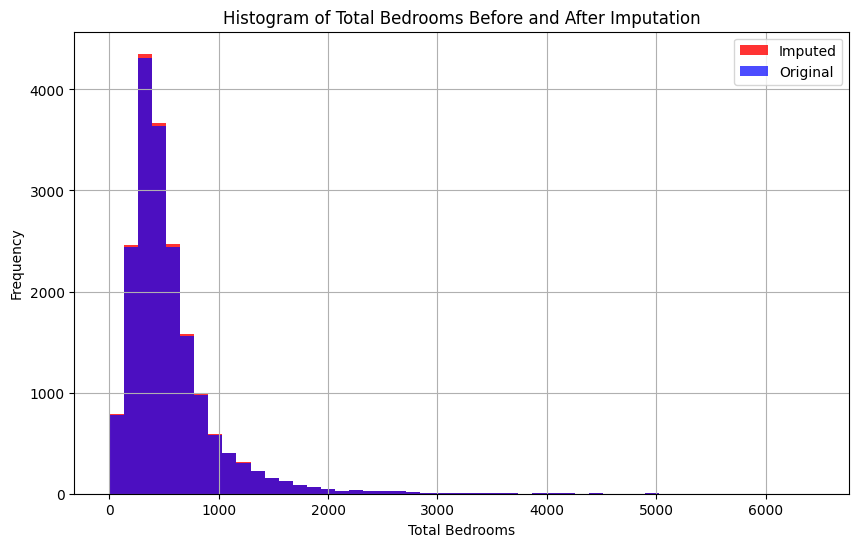

In [18]:
class MissingValuesImputer(BaseEstimator, TransformerMixin):
    """Custom transformer to impute missing values using IterativeImputer.

    This transformer applies the IterativeImputer to the dataset to fill in missing values, creating a new DataFrame
    with the imputed values.

    Attributes:
        imputer (IterativeImputer): The IterativeImputer instance used for imputing missing values.
    """

    def __init__(self, *args, **kwargs) -> None:
        """Initializes the MissingValuesImputer instance.

        Args:
            *args: Variable length argument list passed to the IterativeImputer.
            **kwargs: Arbitrary keyword arguments passed to the IterativeImputer.
        """
        self.imputer = IterativeImputer(*args, **kwargs)

    def fit(self, X, y=None):
        """Fits the IterativeImputer on the dataset.

        Args:
            X: The input dataset with potential missing values.
            y: The target variable (default is None).

        Returns:
            self: Returns the instance itself.
        """
        # Fits the IterativeImputer on the dataset
        self.imputer.fit(X)

        return self

    def transform(self, X):
        """Imputes the missing values in the dataset.

        Args:
            X: The input dataset with potential missing values.

        Returns:
            pd.DataFrame: The transformed dataset with imputed values.
        """
        # Imputes the missing values
        imputed_missing_values = self.imputer.transform(X)

        # Creates a DataFrame with the imputed data
        X_imputed = pd.DataFrame(
            imputed_missing_values,
            columns=X.columns
        )

        return X_imputed


# Imputes the missing values using the median as initial strategy and limiting the minimum value imputed to 1,
# avoiding negative values
mv_imputer = MissingValuesImputer(initial_strategy='median', min_value=1)

# Imputes the missing values
# Attributes should be scaled to impute the missing values, but with few data is negligible
df1 = mv_imputer.fit_transform(df0)

# Plots histograms for the 'total_bedrooms' attribute before and after imputation
plt.figure(figsize=(10, 6))
df1['total_bedrooms'].hist(color='red', alpha=0.8, bins=50, label='Imputed')
df0['total_bedrooms'].hist(color='blue', alpha=0.7, bins=50, label='Original')
plt.legend()
plt.xlabel('Total Bedrooms')
plt.ylabel('Frequency')
plt.title('Histogram of Total Bedrooms Before and After Imputation')
plt.show()

The histogram show that the imputed values closely follow the original distribution, indicating that the IterativeImputer has effectively filled the missing values without significantly altering the overall distribution of the attribute. This suggests that the imputation process has maintained the integrity of the data, making it suitable for subsequent analysis and modeling.

# **Attributes Combinations**

To enhance the dataset with more meaningful attributes, we implement a custom transformer called AttributesCombiner. This transformer computes new attributes related to housing, such as the ratio of rooms to households, bedrooms to households, bedrooms to total rooms, and persons to households.


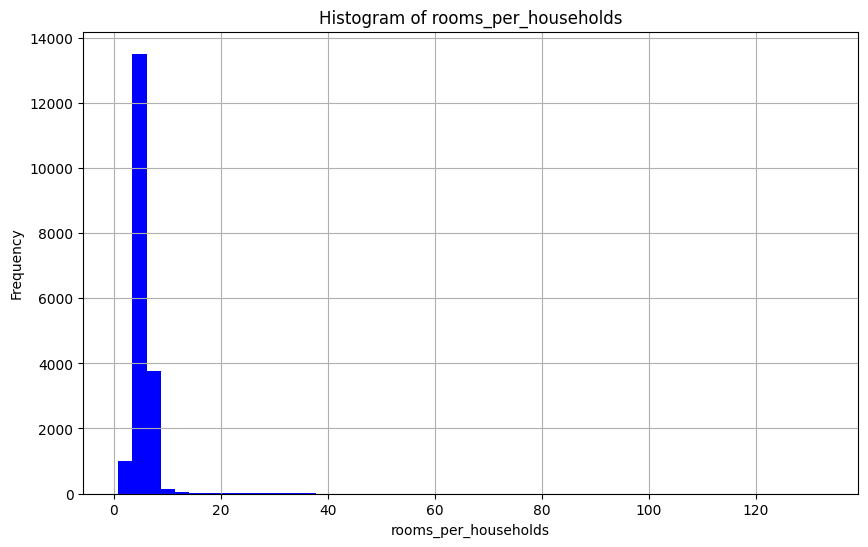

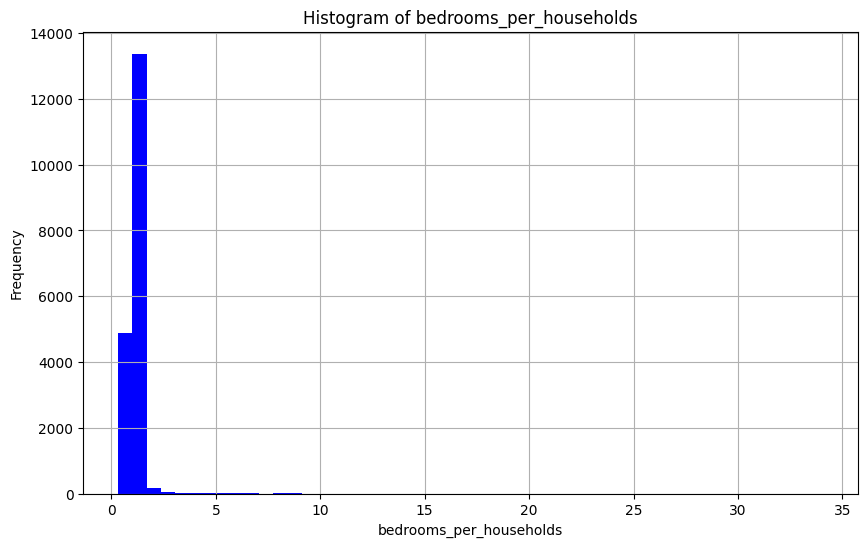

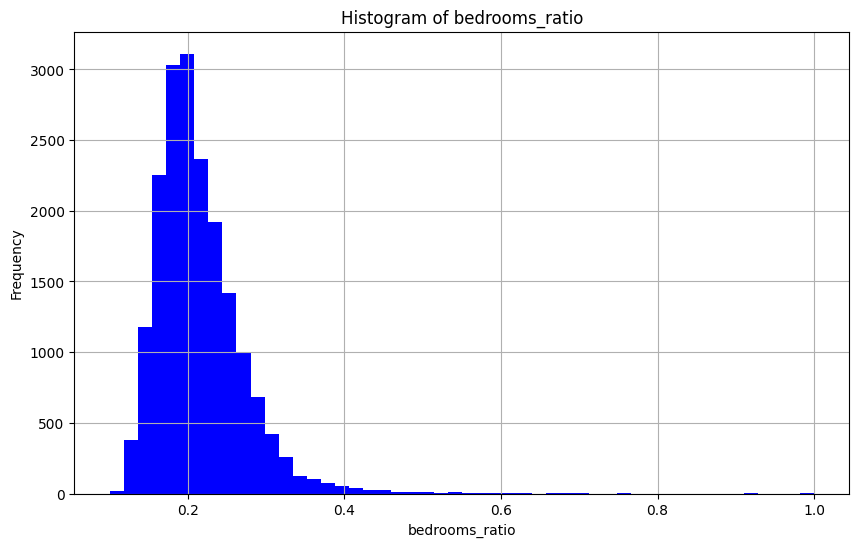

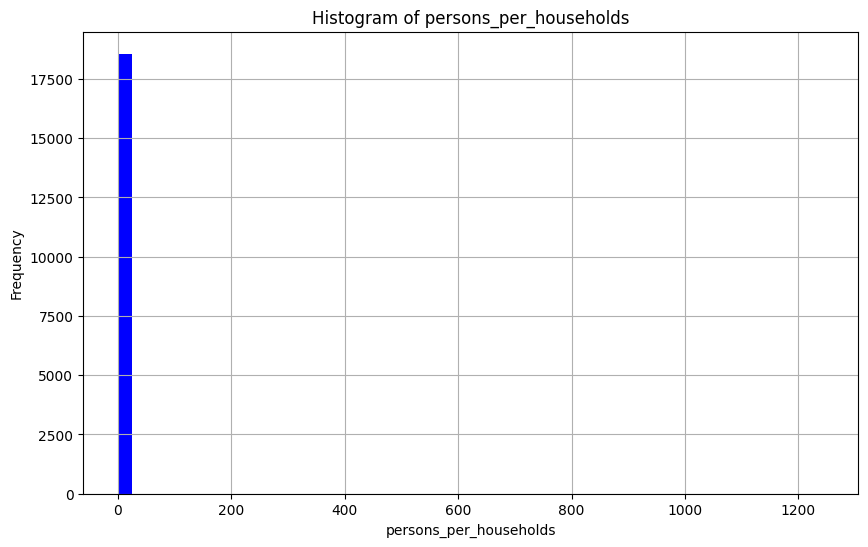

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.26     37.84                42.0       2555.0           665.0   
3    -122.26     37.85                50.0       1120.0           283.0   
4    -122.26     37.84                50.0       2239.0           455.0   

   population  households  median_income  ocean_proximity_inland  \
0       322.0       126.0         8.3252                     0.0   
1      2401.0      1138.0         8.3014                     0.0   
2      1206.0       595.0         2.0804                     0.0   
3       697.0       264.0         2.1250                     0.0   
4       990.0       419.0         1.9911                     0.0   

   ocean_proximity_near_bay  ocean_proximity_near_ocean  rooms_per_households  \
0                       1.0                         0.0              6.984127   
1                       1.0                         0.0              6.238137   
2                       1.0                         0.0              4.294118   
3                       1.0                         0.0              4.242424   
4                       1.0                         0.0              5.343675   

   bedrooms_per_households  bedrooms_ratio  persons_per_households  
0                 1.023810        0.146591                2.555556  
1                 0.971880        0.155797                2.109842  
2                 1.117647        0.260274                2.026891  
3                 1.071970        0.252679                2.640152  
4                 1.085919        0.203216                2.362768

In [19]:
class AttributesCombiner(BaseEstimator, TransformerMixin):
    """Custom transformer for combining housing attributes.

    This transformer calculates the following new attributes:
        - rooms_per_households: Total rooms divided by households.
        - bedrooms_per_households: Total bedrooms divided by households.
        - bedrooms_ratio: Total bedrooms divided by total rooms.
        - persons_per_households: Population divided by households.

    Attributes:
        None
    """
    def fit(self, X, y=None):
        """Fits the AttributesCombiner on the dataset.

        Args:
            X: The input dataset.
            y: The target variable (default is None).

        Returns:
            self: Returns the instance itself.
        """
        return self

    def transform(self, X):
        """Creates new attributes from the dataset.

        Args:
            X: The input dataset.

        Returns:
            pd.DataFrame: The transformed dataset with additional attributes.
        """
        X['rooms_per_households'] = X['total_rooms'] / X['households']                   # [rooms / household]
        X['bedrooms_per_households'] = X['total_bedrooms'] / X['households']             # [bedrooms / household]
        X['bedrooms_ratio'] = X['total_bedrooms'] / X['total_rooms']                     # [bedrooms / rooms]
        X['persons_per_households'] = X['population'] / X['households']                  # [persons / household]

        return X


# Combines attributes from the dataset to create new attributes with meaningfull value
ac_combiner = AttributesCombiner()
df2 = ac_combiner.fit_transform(df1)

# Plots the distribution of the new attributes
for attr in ['rooms_per_households', 'bedrooms_per_households', 'bedrooms_ratio', 'persons_per_households']:
    plt.figure(figsize=(10, 6))
    df2[attr].hist(color='blue', bins=50)
    plt.xlabel(attr)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {attr}')
    plt.show()

df2.head()

The new attributes follow a skewed normal distribution. However, it is clear that the visualization is affected by some outliers, indicating that further processing is necessary to address these anomalies.

# **Data Transformation**

To further process the dataset and stabilize the variance, we implement a custom transformer called AttributesTransformer.

---
**DataFrame Descriptive Statistics**



In [20]:
df2.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  18570.000000  18570.000000        18570.000000  18570.000000   
mean    -119.485046     35.593468           26.983737   2668.999677   
std        1.980939      2.147706           11.432421   2223.891412   
min     -124.300000     32.540000            1.000000      2.000000   
25%     -121.550000     33.920000           17.000000   1455.000000   
50%     -118.450000     34.240000           27.000000   2142.000000   
75%     -117.970000     37.670000           36.000000   3184.000000   
max     -114.310000     41.950000           51.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    18570.000000  18570.000000  18570.000000   18570.000000   
mean       548.057134   1470.488530    508.749004       3.693403   
std        429.127408   1162.969265    389.578268       1.570069   
min          2.000000      3.000000      2.000000       0.499900   
25%        300.000000    811.000000    284.000000       2.537325   
50%        442.000000   1203.000000    416.000000       3.468800   
75%        659.000000   1781.000000    614.000000       4.616100   
max       6445.000000  35682.000000   6082.000000      15.000100   

       ocean_proximity_inland  ocean_proximity_near_bay  \
count            18570.000000              18570.000000   
mean                 0.341626                  0.084383   
std                  0.474268                  0.277969   
min                  0.000000                  0.000000   
25%                  0.000000                  0.000000   
50%                  0.000000                  0.000000   
75%                  1.000000                  0.000000   
max                  1.000000                  1.000000   

       ocean_proximity_near_ocean  rooms_per_households  \
count                18570.000000          18570.000000   
mean                     0.125363              5.387041   
std                      0.331140              2.338004   
min                      0.000000              0.846154   
25%                      0.000000              4.430286   
50%                      0.000000              5.209107   
75%                      0.000000              5.989434   
max                      1.000000            132.533333   

       bedrooms_per_households  bedrooms_ratio  persons_per_households  
count             18570.000000    18570.000000            18570.000000  
mean                  1.098665        0.214095                3.108679  
std                   0.463791        0.055623               10.812229  
min                   0.333333        0.100000                0.692308  
25%                   1.005865        0.177113                2.469457  
50%                   1.048780        0.203968                2.855872  
75%                   1.099721        0.240385                3.320733  
max                  34.066667        1.000000             1243.333333

---
**Implementing the Transformer**

Typically attribute distributions are characterized by long tails and skewed distributions. The implemented transformer aims to transform continuous variables into an almost normally distributed ones, using the Yeo-Johnson method.

The Yeo-Johnson method is very similar to the Box-Cox method. If the attribute is strictly positive, then the Yeo-Johnson transformation is the same as the Box-Cox power transformation of (y + 1). If the attribute is strictly negative, then the Yeo-Johnson transformation is the Box-Cox power transformation of (-y + 1), but with power 2 - Lambda.

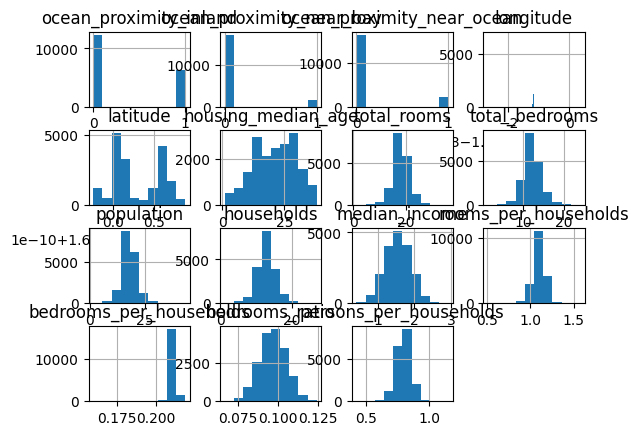

In [21]:
class AttributesTransformer(BaseEstimator, TransformerMixin):
    """Custom transformer that applies a PowerTransformer to the attributes.

    This transformer uses the PowerTransformer to apply a transformation
    to the data, allowing for normalization and variance stabilization.

    Attributes:
        AT_attribute (list): List of names of the attributes to transform.
        transformer (PowerTransformer): An instance of PowerTransformer initialized with the provided arguments.
    """

    def __init__(self, *args, **kwargs) -> None:
        """Initializes the AttributesTransformer instance.

        Args:
            *args: Additional arguments for the PowerTransformer constructor.
            **kwargs: Additional keyword arguments for the PowerTransformer constructor.
        """
        self.transformer = PowerTransformer(*args, **kwargs)
        self.AT_attributes = [
            'longitude', 'latitude', 'housing_median_age', 'total_rooms',
            'total_bedrooms', 'population', 'households', 'median_income',
            'rooms_per_households', 'bedrooms_per_households', 'bedrooms_ratio', 'persons_per_households'
        ]

    def fit(self, X, y=None):
        """Fits the PowerTransformer on the dataset.

        Args:
            X: The input dataset.
            y: The target variable (default is None).

        Returns:
            self: Returns the instance itself.
        """
        # Extracts the attribute to transform
        AT_data = X[self.AT_attributes]

        # Fits the PowerTransformer on the attribute's data
        self.transformer.fit(AT_data)

        return self

    def transform(self, X):
        """Transforms the attribute's data using the fitted PowerTransformer.

        This method applies the transformation to the input data, creating a new DataFrame
        with the transformed data while retaining the original column names.

        Args:
            X: Input DataFrame containing the attributes to be transformed.

        Returns:
            pd.DataFrame: Transformed DataFrame with the same column names as the input DataFrame.
        """
        # Extracts the attribute to transform
        AT_data = X[self.AT_attributes]

        # Transforms the attribute's data
        AT_transformed = self.transformer.transform(AT_data)

        # Creates a DataFrame with the transformed data
        AT_transformed_df = pd.DataFrame(
            AT_transformed,
            index=X.index,
            columns=self.AT_attributes
        )

        # Drops the original attributes and concatenates the new encoded attributes
        X_transformed = X.drop(columns=self.AT_attributes)
        X_transformed = pd.concat([X_transformed, AT_transformed_df], axis=1)

        return X_transformed

# Uses yeo-johnson as the transformation method to handle negative values in the coordinates
at_transformer = AttributesTransformer(method='yeo-johnson', standardize=False)
df3 = at_transformer.fit_transform(df2)
df3.hist()
plt.show()

# **Scaling Quantitative Data Attributes**

To ensure that all attributes are on a common scale, we implement a custom transformer called AttributesScaler.

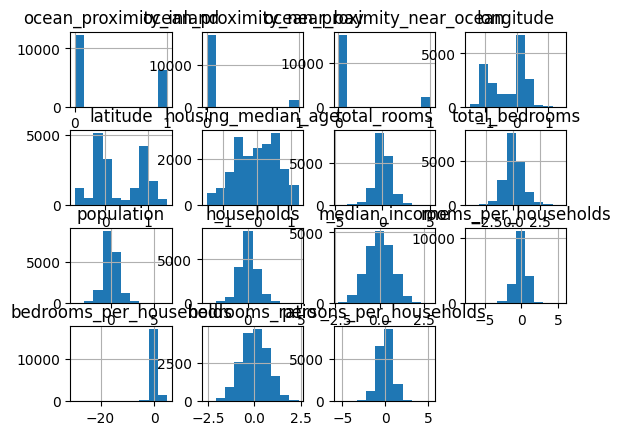

In [22]:
class AttributesRobustScaler(BaseEstimator, TransformerMixin):
    """Custom transformer that scales attributes using RobustScaler.

    This transformer applies RobustSclaer to scale the data for its resistance
    against outliers.

    Attributes:
        AS_attribute (list): List of names of the attributes to scale.
        scaler (RobustScaler): An instance of RobustScaler initialized with the provided arguments.
    """
    def __init__(self, *args, **kwargs) -> None:
        """Initializes the AttributesScaler instance.

        Args:
            *args: Additional arguments for the RobustScaler constructor.
            **kwargs: Additional keyword arguments for the RobustScaler constructor.
        """
        self.scaler = RobustScaler(*args, **kwargs)
        self.AS_attributes = [
            'longitude', 'latitude', 'housing_median_age', 'total_rooms',
            'total_bedrooms', 'population', 'households', 'median_income',
            'rooms_per_households', 'bedrooms_per_households', 'bedrooms_ratio', 'persons_per_households'
        ]

    def fit(self, X, y=None):
        """Fits the RobustScaler on the dataset.

        Args:
            X: The input dataset.
            y: The target variable (default is None).

        Returns:
            self: Returns the instance itself.
        """
        # Extracts the attribute to scale
        AS_data = X[self.AS_attributes]

        # Fits the RobustScaler on the attribute's data
        self.scaler.fit(AS_data)

        return self

    def transform(self, X):
        """Scales the attribute's data using the fitted RobustScaler.

        This method applies the normalization to the input data, creating a new DataFrame
        with the scaled data while retaining the original column names.

        Args:
            X: Input DataFrame containing the attributes to be scaled.

        Returns:
            pd.DataFrame: Scaled DataFrame with the same column names as the input DataFrame.
        """
        # Extracts the attribute to scale
        AS_data = X[self.AS_attributes]

        # Scales the attribute's data
        AS_scaled = self.scaler.transform(AS_data)

        # Creates a DataFrame with the scaled data
        AS_scaled_df = pd.DataFrame(
            AS_scaled,
            index=X.index,
            columns=self.AS_attributes
        )

        # Drops the original attributes and concatenates the new encoded attributes
        X_scaled = X.drop(columns=self.AS_attributes)
        X_scaled = pd.concat([X_scaled, AS_scaled_df], axis=1)

        return X_scaled


# Scales the features to a common scale
ars_scaler = AttributesRobustScaler()
df3 = ars_scaler.fit_transform(df3)

df3.hist()
plt.show()

The histograms display the distribution of the scaled features after applying the AttributeRobustScaler. Each attribute is now on a common scale.

The plots show that the transformation (applied with AttributeTransformer) and scaling process have successfully transformed the attributes into features.

# **Outliers Detection**

After transforming and scaling the attributes, the next critical step is to perform outlier detection on the resulting features.

Outliers are data points that significantly deviate from the overall pattern of the dataset, and identifying them is essential as they can distort statistical analyses and models. By detecting and analyzing these outliers, we can ensure the integrity and accuracy of our data, leading to more reliable and robust analytical outcomes. The following section will detail the methods and techniques used to identify outliers in the transformed and scaled features, ensuring a thorough examination of the dataset.

---
**DataFrame Descriptive Statistics**


In [23]:
df3.describe()

ocean_proximity_inland  ocean_proximity_near_bay  \
count            18570.000000              18570.000000   
mean                 0.341626                  0.084383   
std                  0.474268                  0.277969   
min                  0.000000                  0.000000   
25%                  0.000000                  0.000000   
50%                  0.000000                  0.000000   
75%                  1.000000                  0.000000   
max                  1.000000                  1.000000   

       ocean_proximity_near_ocean     longitude      latitude  \
count                18570.000000  18570.000000  18570.000000   
mean                     0.125363     -0.267047      0.305216   
std                      0.331140      0.553626      0.557142   
min                      0.000000     -1.487395     -0.711531   
25%                      0.000000     -0.848739     -0.116059   
50%                      0.000000      0.000000      0.000000   
75%                      0.000000      0.151261      0.883941   
max                      1.000000      1.420168      1.441056   

       housing_median_age   total_rooms  total_bedrooms    population  \
count        18570.000000  18570.000000    18570.000000  18570.000000   
mean            -0.014142      0.033613        0.041442      0.030559   
std              0.605147      0.905821        0.878902      0.881973   
min             -1.477264     -4.669916       -4.006643     -4.071514   
25%             -0.534921     -0.474296       -0.472531     -0.478927   
50%              0.000000      0.000000        0.000000      0.000000   
75%              0.465079      0.525704        0.527469      0.521073   
max              1.216726      5.027651        4.506721      6.477019   

         households  median_income  rooms_per_households  \
count  18570.000000   18570.000000          18570.000000   
mean       0.035932      -0.006231             -0.069066   
std        0.891237       0.713160              0.855426   
min       -3.868600      -2.312172             -7.044492   
25%       -0.473257      -0.503399             -0.549915   
50%        0.000000       0.000000              0.000000   
75%        0.526743       0.496601              0.450085   
max        4.770442       2.829397              5.503180   

       bedrooms_per_households  bedrooms_ratio  persons_per_households  
count             18570.000000    1.857000e+04            18570.000000  
mean                  0.067789    1.310745e-02               -0.016873  
std                   1.150038    7.232383e-01                0.835551  
min                 -29.546832   -2.589099e+00               -5.490274  
25%                  -0.489008   -4.827039e-01               -0.505021  
50%                   0.000000   -6.012443e-16                0.000000  
75%                   0.510992    5.172961e-01                0.494979  
max                   4.803349    2.389571e+00                5.229180

---
**Inferring the Hypershpere Radius**

The hypersphere radius can be inferred from the kNN-distance graph, the point of maximal curvature tells the value of the radius.

Before computing kNN distance, the feature have been transformed and rescaled to avoid distortions.


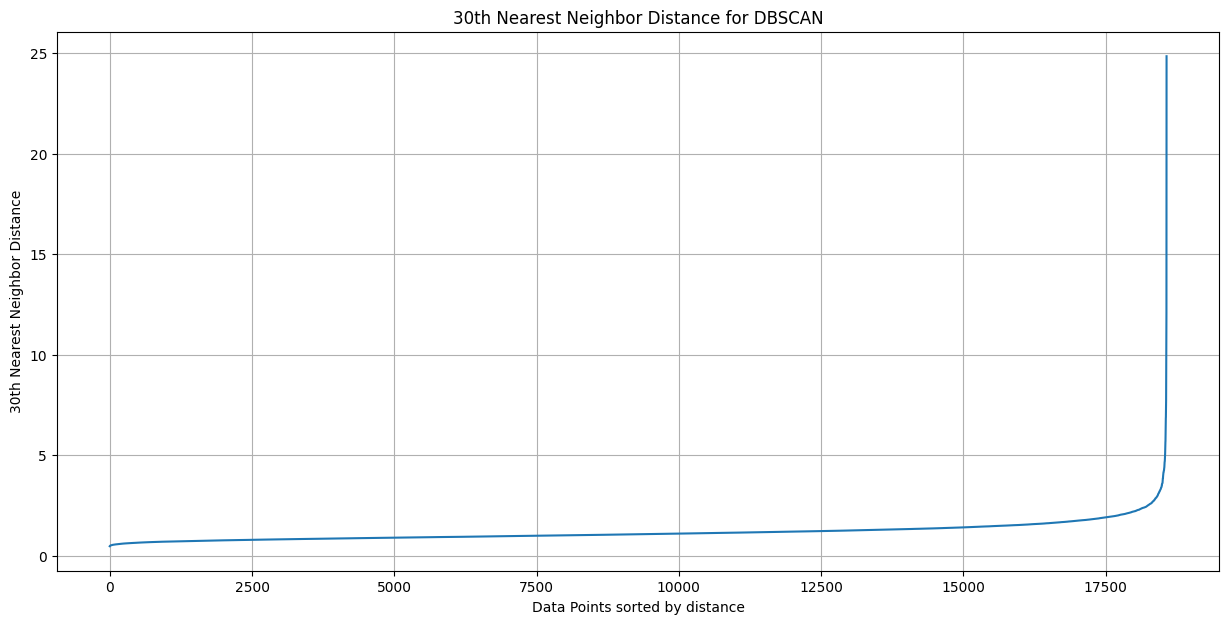

In [24]:
# The minimum number of data points required inside the hypersphere for that data point to be classified as Core point
# must be greater than the feature space k > d + 1 (a common value for k is 2 * d, d is the number of attributes)
k = len(df3.columns) * 2

# Compute the k-nearest neighbors for each data point
knn_model = NearestNeighbors(n_neighbors=k)
knn_model.fit(df3)

distances, indices = knn_model.kneighbors(df3)
distances = np.sort(distances[:, k-1], axis=0)

# Plots the kNN distance graph
plt.figure(figsize=(15, 7))
plt.plot(distances)
plt.xlabel('Data Points sorted by distance')
plt.ylabel(f'{k}th Nearest Neighbor Distance')
plt.title(f'{k}th Nearest Neighbor Distance for DBSCAN')
plt.grid()
plt.show()

The maximum curvature is obtained at a distance of around 2.5, this value will be used as the epsilon parameter in DBSCAN.

---
**Global Outliers Detection with DBSCAN**

Having inferred the appropriate epsilon value, we proceed to apply the Density-Based Spatial Clustering of Applications with Noise (DBSCAN) algorithm to the dataset to identify global outliers.

In [25]:
# Epsilon value is inferred from the kNN distance graph and the min_samples is kept equal to k
dbscan = DBSCAN(eps=2.5, min_samples=k)
clusters = dbscan.fit_predict(df3)

# Creates a new feature 'cluster' which is used to filter the outliers
df4 = df3.copy()
df4['cluster'] = clusters

# Filters outliers
df4 = df4[df4['cluster'] != -1]
y1 = y.loc[df4.index]
df4 = df4.drop('cluster', axis=1)

# Resets indexes
df4 = df4.reset_index(drop=True)
y1 = y1.reset_index(drop=True)

print(f"DataFrame with outliers: {df3.shape}")
print(f"DataFrame after DBSCAN: {df4.shape}")
print(f"Number of outliers: {df3.shape[0] - df4.shape[0]}")
df4.head()

DataFrame with outliers: (18570, 15)
DataFrame after DBSCAN: (18470, 15)
Number of outliers: 100


ocean_proximity_inland  ocean_proximity_near_bay  \
0                     0.0                       1.0   
1                     0.0                       1.0   
2                     0.0                       1.0   
3                     0.0                       1.0   
4                     0.0                       1.0   

   ocean_proximity_near_ocean  longitude  latitude  housing_median_age  \
0                         0.0  -1.016807  0.921953            0.718472   
1                         0.0  -1.016807  0.918394           -0.318137   
2                         0.0  -1.025210  0.914822            0.768783   
3                         0.0  -1.025210  0.916610            1.167357   
4                         0.0  -1.025210  0.914822            1.167357   

   total_rooms  total_bedrooms  population  households  median_income  \
0    -1.038607       -1.380995   -1.446093   -1.353608       1.614542   
1     1.725105        1.277790    0.950063    1.462556       1.608853   
2     0.228696        0.539940    0.003164    0.482471      -0.799105   
3    -0.775042       -0.540494   -0.651805   -0.559212      -0.768446   
4     0.056693        0.036862   -0.242051    0.009308      -0.861794   

   rooms_per_households  bedrooms_per_households  bedrooms_ratio  \
0              0.919024                -0.277485       -1.166961   
1              0.576982                -0.919815       -0.943203   
2             -0.659221                 0.674898        0.746752   
3             -0.701905                 0.241316        0.662989   
4              0.083921                 0.379372       -0.012226   

   persons_per_households  
0               -0.383632  
1               -1.079517  
2               -1.230059  
3               -0.269591  
4               -0.663476

The application of DBSCAN with the inferred epsilon on the dataset successfully identified 91 records as global outliers. These records, representing points in regions of low density and significantly deviating from the majority of the data, have been discarded.

---
**Local Outliers Detection**

With global outliers removed, we proceed to detect local outliers within the dataset using the Local Outlier Factor (LOF) algorithm. To find the correct value to be used as threshold, the graph of LOF values and frequency is plotted.

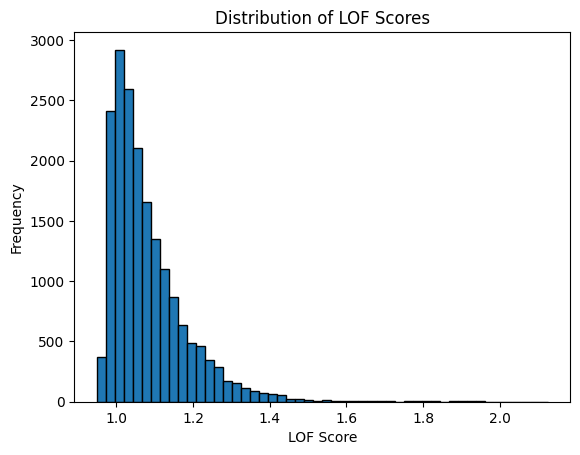

In [26]:
clf = LocalOutlierFactor(n_neighbors=k + 2, contamination=1e-8)
_ = clf.fit(df4)

# 3. Get LOF scores
lof_scores = -clf.negative_outlier_factor_

# 4. Plot the distribution
plt.hist(lof_scores, bins=50, edgecolor='k')
plt.xlabel('LOF Score')
plt.ylabel('Frequency')
plt.title('Distribution of LOF Scores')
plt.show()

Visualizing the distribution of data, a hand-picked threshold is about 1.42.

In [27]:
# Picks a threshold (99 percentile)
threshold = np.quantile(lof_scores, 0.99)
threshold

1.424667174547152

The threshold is confirmed by finding the 99-percentile of the LOF values.

In [28]:
df5 = df4.copy()

# Marks outliers if LOF score exceeds threshold
df5['outlier'] = np.where(lof_scores > threshold, -1, 1)
print(f"Number of local outliers: {(df5['outlier'] == -1).sum()}")

# Filters out the outliers
df5 = df5[df5['outlier'] == 1]
y2 = y1.loc[df5.index]
df5 = df5.drop('outlier', axis=1)

# Resets indexes
df5 = df5.reset_index(drop=True)
y2 = y2.reset_index(drop=True)

print(f"DataFrame after LOF: {df5.shape}")

Number of local outliers: 185
DataFrame after LOF: (18285, 15)


The application of LOF on the cleaned dataset (after removing global outliers) results in the identification of 185 local outliers. These outliers are points that exhibit anomalous behavior within their local context, providing insights into localized anomalies in the data.

# **Correlation between Features**

After removing outliers from the dataset, it is essential to perform feature analysis to identify the correlations between features. This analysis helps us better understand the underlying dynamics of the data and identify significant trends. By examining the relationships between features, we can gain valuable insights that inform our further analyses and modeling efforts. The following section will detail the methods used to analyze feature correlations, enhancing our understanding of the dataset's structure.

---
**Scaling the Features in a Common Range**

Below proceeding with the correlation between features, the dataset undergo a custom scaler that scales the features between the common range [0, 1].

In [29]:
class AttributesScaler(BaseEstimator, TransformerMixin):
    """Custom transformer that scales attributes using MinMaxScaler.

    This transformer applies MinMaxScaler to scale the data between the
    range [0, 1]. This method is applied after outlier detection due to
    its sensitivity to outliers.

    Attributes:
        AS_attribute (list): List of names of the attributes to scale.
        scaler (MinMaxScaler): An instance of MinMaxScaler initialized with the provided arguments.
    """
    def __init__(self, *args, **kwargs) -> None:
        """Initializes the AttributesScaler instance.

        Args:
            *args: Additional arguments for the MinMaxScaler constructor.
            **kwargs: Additional keyword arguments for the MinMaxScaler constructor.
        """
        self.scaler = MinMaxScaler(*args, **kwargs)
        self.AS_attributes = [
            'longitude', 'latitude', 'housing_median_age', 'total_rooms',
            'total_bedrooms', 'population', 'households', 'median_income',
            'rooms_per_households', 'bedrooms_per_households', 'bedrooms_ratio', 'persons_per_households'
        ]

    def fit(self, X, y=None):
        """Fits the MinMaxScaler on the dataset.

        Args:
            X: The input dataset.
            y: The target variable (default is None).

        Returns:
            self: Returns the instance itself.
        """
        AS_data = X[self.AS_attributes]

        # Fits the MinMaxScaler on the attribute's data
        self.scaler.fit(AS_data)

        return self

    def transform(self, X):
        """Scales the attribute's data using the fitted MinMaxScaler.

        This method applies the normalization to the input data, creating a new DataFrame
        with the scaled data while retaining the original column names.

        Args:
            X: Input DataFrame containing the attributes to be scaled.

        Returns:
            pd.DataFrame: Scaled DataFrame with the same column names as the input DataFrame.
        """
        # Extracts the attribute to scale
        AS_data = X[self.AS_attributes]

        # Scales the attribute's data
        AS_scaled = self.scaler.transform(AS_data)

        # Creates a DataFrame with the scaled data
        AS_scaled_df = pd.DataFrame(
            AS_scaled,
            index=X.index,
            columns=self.AS_attributes
        )

        # Drops the original attributes and concatenates the new encoded attributes
        X_scaled = X.drop(columns=self.AS_attributes)
        X_scaled = pd.concat([X_scaled, AS_scaled_df], axis=1)

        return X_scaled

# Scales the features to a common scale
as_scaler = AttributesScaler()
df6 = as_scaler.fit_transform(df5)
df6.describe()

ocean_proximity_inland  ocean_proximity_near_bay  \
count            18285.000000              18285.000000   
mean                 0.341537                  0.084386   
std                  0.474238                  0.277974   
min                  0.000000                  0.000000   
25%                  0.000000                  0.000000   
50%                  0.000000                  0.000000   
75%                  1.000000                  0.000000   
max                  1.000000                  1.000000   

       ocean_proximity_near_ocean     longitude      latitude  \
count                18285.000000  18285.000000  18285.000000   
mean                     0.124255      0.419609      0.472552   
std                      0.329881      0.190226      0.258964   
min                      0.000000      0.000000      0.000000   
25%                      0.000000      0.219653      0.276631   
50%                      0.000000      0.511561      0.330547   
75%                      0.000000      0.563584      0.741188   
max                      1.000000      1.000000      1.000000   

       housing_median_age   total_rooms  total_bedrooms    population  \
count        18285.000000  18285.000000    18285.000000  18285.000000   
mean             0.543917      0.428272        0.464972      0.447933   
std              0.223610      0.101871        0.110520      0.105717   
min              0.000000      0.000000        0.000000      0.000000   
25%              0.370063      0.368156        0.397271      0.384400   
50%              0.548355      0.422966        0.458014      0.443335   
75%              0.720991      0.484043        0.526692      0.507422   
max              1.000000      1.000000        1.000000      1.000000   

         households  median_income  rooms_per_households  \
count  18285.000000   18285.000000          18285.000000   
mean       0.447547       0.475091              0.444669   
std        0.109409       0.144908              0.082706   
min        0.000000       0.000000              0.000000   
25%        0.382251       0.372989              0.396634   
50%        0.441588       0.476277              0.451020   
75%        0.508022       0.577848              0.495522   
max        1.000000       1.000000              1.000000   

       bedrooms_per_households  bedrooms_ratio  persons_per_households  
count             18285.000000    18285.000000            18285.000000  
mean                  0.539099        0.485389                0.516535  
std                   0.100573        0.162422                0.122461  
min                   0.000000        0.000000                0.000000  
25%                   0.483657        0.373517                0.443591  
50%                   0.530874        0.482693                0.520184  
75%                   0.580293        0.599657                0.594769  
max                   1.000000        1.000000                1.000000

---
**Scatter Plot & Correlation Matrix**

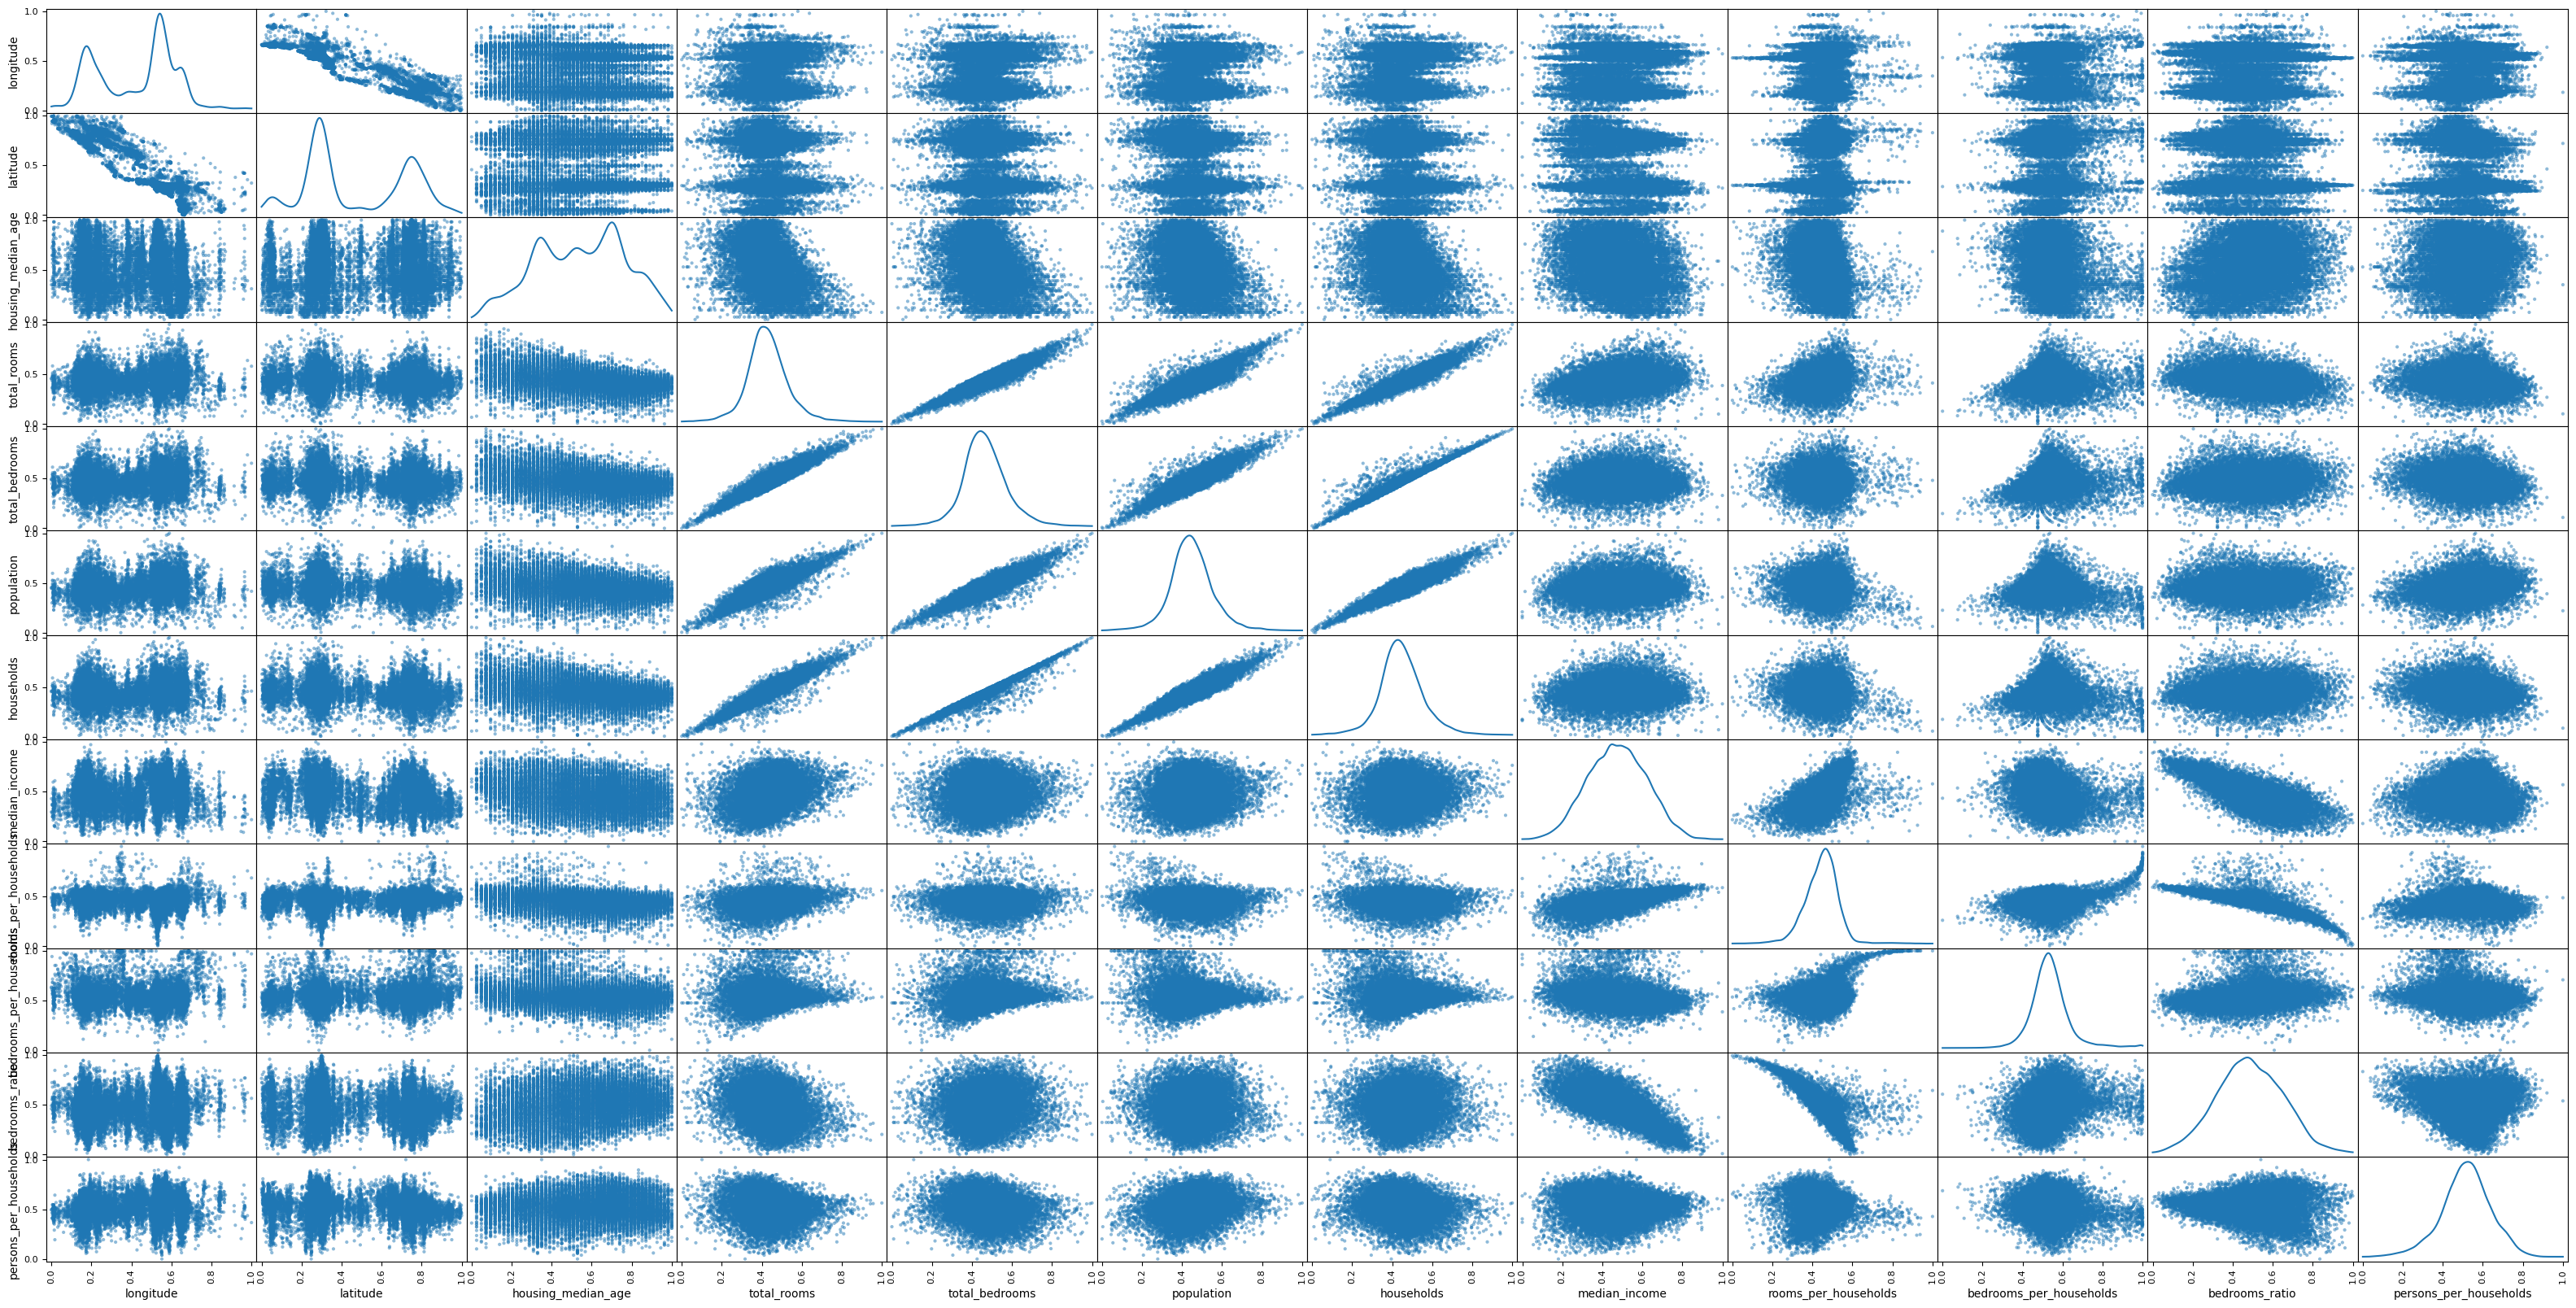

In [30]:
df_corr = df6.copy()
df_corr = df_corr.drop(columns=['ocean_proximity_inland', 'ocean_proximity_near_bay', 'ocean_proximity_near_ocean'])

# Plots the scatter matrix with the Kernel Density Estimate as diagonal
pd.plotting.scatter_matrix(df_corr, figsize=(40, 20), diagonal='kde')
plt.show()

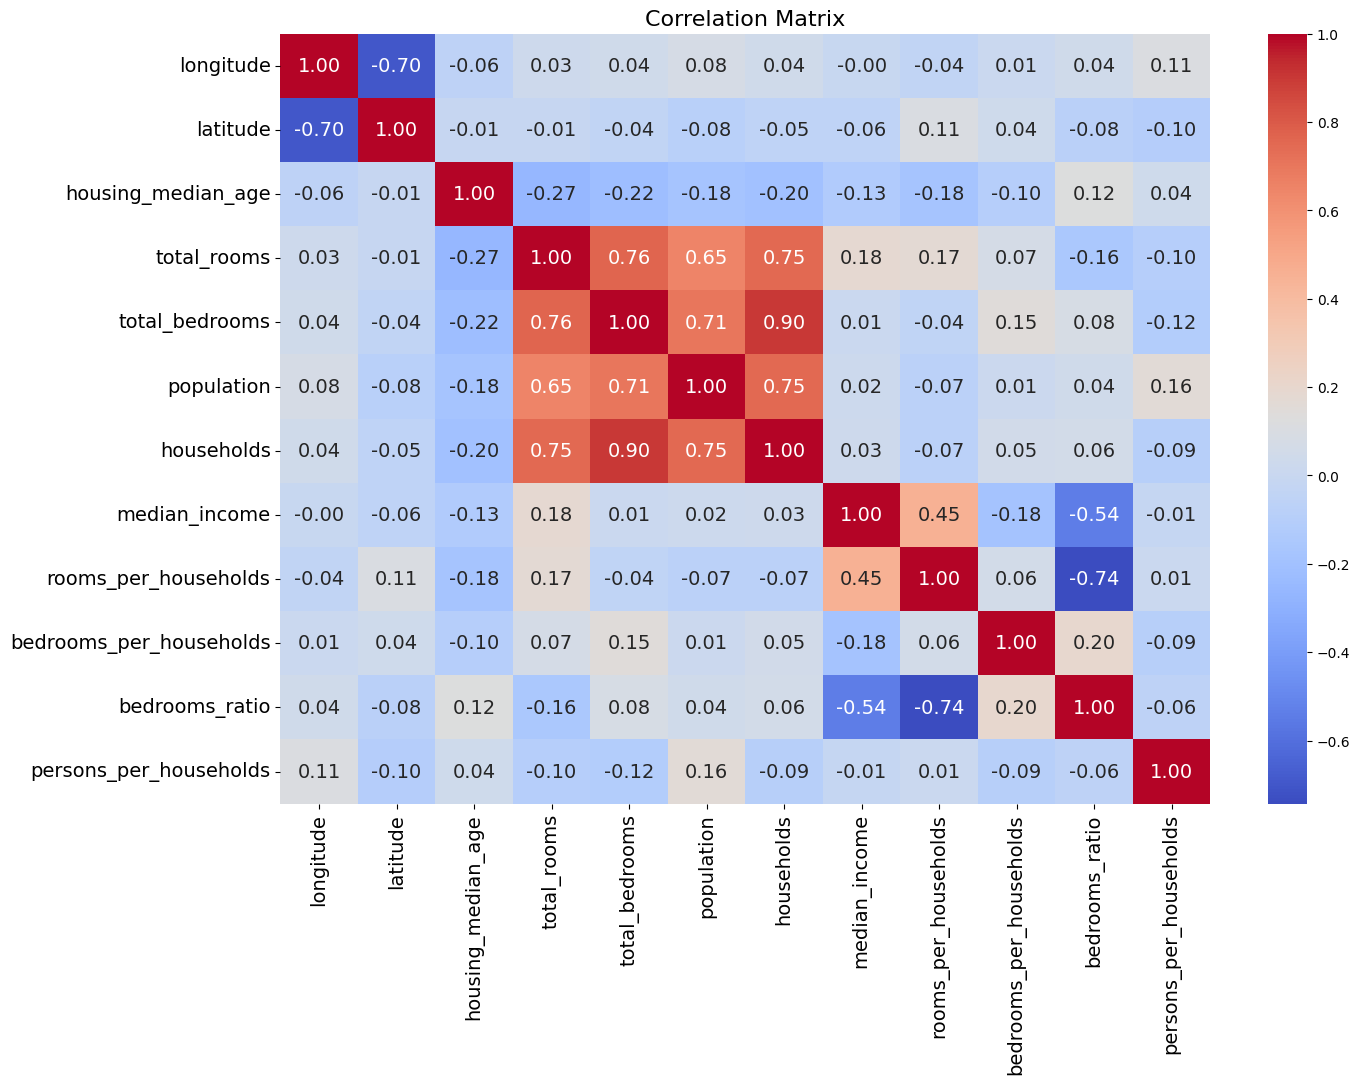

In [31]:
# Generates the correlation matrix
corr_matrix = df_corr.corr(method='kendall')

# Plots the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 14})
plt.title('Correlation Matrix', fontsize=16)
plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=14)
plt.show()

The analysis will cover the most significant correlations (|r| >= 0.45):

- **Latitude & Longitude**: -0.70, a very strong negative correlation, reflecting the general geographic layout of California, suggesting that southeast coordinates are more common.
- **Multi-collinearity**: There is a strong positive correlation between the features total_rooms, total_bedrooms, population, and households. This indicates that if one feature increases, all the others will increase as well. For linear regression, it might be useful to drop households, which is almost perfectly collinear with total_bedrooms.
- **Rooms per Households & Median Income**: 0.45, a positive correlation, indicating that wealthier households can afford larger homes with more rooms.
- **Bedrooms Ratio & Median Income**: -0.54, a strong negative correlation, indicating that the bedrooms ratio decreases as median income increases, meaning that larger houses have more rooms that aren't bedrooms.
- **Bedrooms Ratio & Rooms per Households**: -0.74, a very strong negative correlation, suggesting that when there are many rooms relative to the household, fewer of these rooms are designated as bedrooms, indicating more specialized room usage.

# **Storing Data and Pipeline**


---
**Dataset storing**

In [ ]:
# Saves the dataset and the related labels
df6.to_csv('X.csv', index=False)
y2.to_csv('y.csv', index=False)

NameError: name 'df6' is not defined

---
**Pipeline storing**

In [35]:
# Init DagsHub
dagshub.init(repo_owner='matteogianferrari', repo_name='homelens-ca', mlflow=True)
TRACKING_URI = "https://dagshub.com/matteogianferrari/homelens-ca.mlflow"

# Sets MLFlow tracking URI
mlflow.set_tracking_uri(TRACKING_URI)

# Sets MLFLow experiment name
experiment_name = "HomeLens CA-Pipeline"

❗❗❗ AUTHORIZATION REQUIRED ❗❗❗

Output()



Open the following link in your browser to authorize the client:
https://dagshub.com/login/oauth/authorize?state=cf888a31-d9b9-4a01-9505-a0c6ea4fb36d&client_id=32b60ba385aa7cecf24046d8195a71c07dd345d9657977863b52e7748e0f0f28&middleman_request_id=6353cdde3c56f4509670d99a91b6a2408296e4ea585aef84c2fd8c2f87e37b3a




Accessing as matteogianferrari

Initialized MLflow to track repo "matteogianferrari/homelens-ca"

Repository matteogianferrari/homelens-ca initialized!

In [36]:
sk_pipeline = Pipeline(
    steps = [
        ('ocean_encoder', op_encoder),
        ('attributes_combiner', ac_combiner),
        ('attributes_transformer', at_transformer),
        ('attributes_robust_scaler', ars_scaler),
        ('attributes_scaler', as_scaler)
    ]
)

# Stores the pipeline on MLFLow
# Sets the MLFlow experiment
mlflow.set_experiment(experiment_name)

mlflow.sklearn.log_model(sk_pipeline, 'pipeline')

mlflow.end_run()

2025/01/24 18:51:49 INFO mlflow.tracking.fluent: Experiment with name 'HomeLens CA-Pipeline' does not exist. Creating a new experiment.
2025/01/24 18:51:50 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
2025/01/24 18:51:56 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
